## **Data Extraction, Cleaning, and Initial Exploratory Data Analysis (EDA)**

### **Step 1: Data Extraction**

In [12]:
import pandas as pd

In [13]:
diabetes_dataset_filepath = '../Data & AI  PAN Datathon Nov 24/diabetes_data.csv'

# Read the CSV into a Pandas DataFrame
diabetes_data = pd.read_csv(diabetes_dataset_filepath)

In [14]:
# Quick view of data
diabetes_data

,gender,age,hypertension,diabetes_pedigree_function,diet_type,star_sign,BMI,weight,family_diabetes_history,social_media_usage,physical_activity_level,sleep_duration,stress_level,pregnancies,alcohol_consumption,diabetes
0,female,NaN,NaN,0.37,paleo,NaN,NaN,197.7,NaN,Occasionally,Sedentary,1.5,Low,NaN,light,1.0
1,male,59.0,0.0,0.73,NaN,Leo,17.1,156.5,0.0,Occasionally,Lightly Active,5.4,Moderate,0.0,none,1.0
2,female,31.0,NaN,NaN,NaN,NaN,22.5,137.8,NaN,Occasionally,Lightly Active,7.6,Low,0.0,light,1.0
3,female,81.0,1.0,0.37,pescatarian,NaN,NaN,108.2,0.0,NaN,Sedentary,7.7,Low,1.0,heavy,NaN
4,NaN,64.0,0.0,0.55,carnivore,NaN,NaN,179.7,NaN,Occasionally,Sedentary,7.8,NaN,0.0,heavy,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,male,24.0,NaN,0.29,vegetarian,Libra,18.9,56.0,0.0,Never,Sedentary,2.6,Elevated,0.0,light,1.0
99996,male,53.0,1.0,0.64,weight watchers,NaN,28.4,140.8,NaN,Excessive,Lightly Active,7.5,Moderate,0.0,NaN,1.0
99997,male,61.0,0.0,0.34,NaN,Taurus,NaN,NaN,NaN,Excessive,Lightly Active,2.8,Moderate,0.0,heavy,1.0
99998,male,NaN,0.0,0.71,mediterranean,Leo,28.8,123.6,0.0,Excessive,Sedentary,0.4,Moderate,0.0,none,1.0


In [4]:
# Summary info at column level
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      79954 non-null  object 
 1   age                         80145 non-null  float64
 2   hypertension                80169 non-null  float64
 3   diabetes_pedigree_function  80120 non-null  float64
 4   diet_type                   79939 non-null  object 
 5   star_sign                   79806 non-null  object 
 6   BMI                         79934 non-null  float64
 7   weight                      80126 non-null  float64
 8   family_diabetes_history     79863 non-null  float64
 9   social_media_usage          79968 non-null  object 
 10  physical_activity_level     80032 non-null  object 
 11  sleep_duration              80063 non-null  float64
 12  stress_level                80024 non-null  object 
 13  pregnancies                 80

In [5]:
# Summary stats for numeric data
diabetes_data.describe()

,age,hypertension,diabetes_pedigree_function,BMI,weight,family_diabetes_history,sleep_duration,pregnancies,diabetes
count,80145.000000,80169.000000,80120.000000,79934.000000,80126.000000,79863.000000,80063.000000,80033.000000,80242.000000
mean,45.107306,0.202248,0.500877,26.978545,150.526618,0.302167,5.295149,0.758212,0.954936
std,18.550434,0.401678,0.173783,6.005039,57.731539,0.459200,2.842133,1.281326,0.207445
min,18.000000,0.000000,0.200000,1.800000,50.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,0.350000,22.900000,100.300000,0.000000,3.300000,0.000000,1.000000
50%,45.000000,0.000000,0.500000,27.000000,150.900000,0.000000,5.300000,0.000000,1.000000
75%,60.000000,0.000000,0.650000,31.000000,200.400000,1.000000,7.000000,1.000000,1.000000
max,91.000000,1.000000,0.800000,53.100000,250.000000,1.000000,12.000000,5.000000,1.000000


In [6]:
# Number of unique values per column - helps identify if continuous, discrete, or categorical
diabetes_data.nunique()

gender                           2
age                             74
hypertension                     2
diabetes_pedigree_function      61
diet_type                       12
star_sign                       12
BMI                            446
weight                        2001
family_diabetes_history          2
social_media_usage               4
physical_activity_level          5
sleep_duration                 102
stress_level                     4
pregnancies                      6
alcohol_consumption              4
diabetes                         2
dtype: int64

### **Step 2: Data Cleaning & Preprocessing**

##### **Part A: Handling Missing Values**

In [7]:
# Check how many missing values
diabetes_data.isnull().sum()

gender                        20046
age                           19855
hypertension                  19831
diabetes_pedigree_function    19880
diet_type                     20061
star_sign                     20194
BMI                           20066
weight                        19874
family_diabetes_history       20137
social_media_usage            20032
physical_activity_level       19968
sleep_duration                19937
stress_level                  19976
pregnancies                   19967
alcohol_consumption           20104
diabetes                      19758
dtype: int64

In [8]:
null_gender_before = diabetes_data['gender'].isnull().sum()
null_pregnancies_before = diabetes_data['pregnancies'].isnull().sum()

# Fill 'gender' as 'female' where 'pregnanices' is greater than 0 and 'gender' is null
diabetes_data.loc[(diabetes_data['gender'].isnull()) & (diabetes_data['pregnancies'] > 0), 'gender'] = 'female'
# Fill null 'pregnancies' values as 0 where 'gender' is male
diabetes_data.loc[(diabetes_data['pregnancies'].isnull()) & (diabetes_data['gender'] == 'male'), 'pregnancies'] = 0

null_gender_after = diabetes_data['gender'].isnull().sum()
null_pregnancies_after = diabetes_data['pregnancies'].isnull().sum()

null_gender_vals_changed = null_gender_before - null_gender_after
null_pregnancies_vals_changed = null_pregnancies_before - null_pregnancies_after

print(f"Number of rows changed (null gender values replaced): {null_gender_vals_changed} \n New null gender value: {null_gender_after}")
print(f"Number of rows changed (null pregnancies values replaced): {null_pregnancies_vals_changed} \n New null gender value: {null_pregnancies_after}")

# diabetes_data['age'].fillna(diabetes_data['age'].mean(), inplace=True)

Number of rows changed (null gender values replaced): 5815 
 New null gender value: 14231
Number of rows changed (null pregnancies values replaced): 8784 
 New null gender value: 11183


##### **Part B: Handling Outliers**

In [24]:
# Example using IQR to handle outliers for 'BMI' column
Q1 = diabetes_data['BMI'].quantile(0.25)
Q3 = diabetes_data['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'BMI Upper Bound: {round(upper_bound, 2)}')
print(f'BMI Lower Bound: {round(lower_bound, 2)}')
bmi_outliers = diabetes_data[(diabetes_data['BMI'] < lower_bound) | (diabetes_data['BMI'] > upper_bound)]
bmi_outliers.info()

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

BMI Upper Bound: 43.15
BMI Lower Bound: 10.75
<class 'pandas.core.frame.DataFrame'>
Index: 575 entries, 88 to 99788
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      455 non-null    object 
 1   age                         445 non-null    float64
 2   hypertension                443 non-null    float64
 3   diabetes_pedigree_function  464 non-null    float64
 4   diet_type                   468 non-null    object 
 5   star_sign                   461 non-null    object 
 6   BMI                         575 non-null    float64
 7   weight                      457 non-null    float64
 8   family_diabetes_history     459 non-null    float64
 9   social_media_usage          447 non-null    object 
 10  physical_activity_level     465 non-null    object 
 11  sleep_duration              450 non-null    float64
 12  stress_level                463 non-null    obje

##### **Part C: Handling Inconsistencies**

In [11]:
# Remove or Modify Irrelevant Columns

# df.drop(columns=['star_sign', 'social_media_usage'], inplace=True)

##### **Part D: Encoding Categorical Variables**

##### **Part E: Normalising/Scaling Numerical Features**

### **Part 3: Inital Exploratory Data Analysis (EDA)**

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Summary info at column level
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   gender                      85769 non-null  object 
 1   age                         80145 non-null  float64
 2   hypertension                80169 non-null  float64
 3   diabetes_pedigree_function  80120 non-null  float64
 4   diet_type                   79939 non-null  object 
 5   star_sign                   79806 non-null  object 
 6   BMI                         79934 non-null  float64
 7   weight                      80126 non-null  float64
 8   family_diabetes_history     79863 non-null  float64
 9   social_media_usage          79968 non-null  object 
 10  physical_activity_level     80032 non-null  object 
 11  sleep_duration              80063 non-null  float64
 12  stress_level                80024 non-null  object 
 13  pregnancies                 88

In [14]:
# Statistics, Distributions, Visualisations

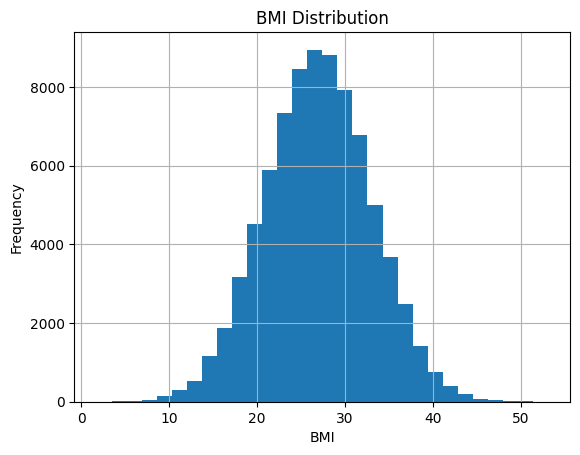

In [16]:
# Histogram
diabetes_data['BMI'].hist(bins=30)
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

### **Part 4: Save the Processed Dataset**

In [ ]:
#diabetes_data.to_csv('cleaned_diabetes_data.csv', index=False)